# 影像壓縮(Image Compression)

## 載入相關套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

## 載入測試圖片

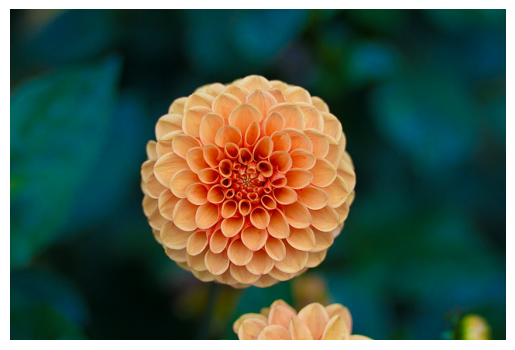

In [2]:
flower = load_sample_image("flower.jpg")
plt.axis("off")
plt.imshow(flower);

In [3]:
# 存檔
plt.imsave("./data/flower.jpg", flower)

## 正規化、取得圖片寬高及顏色維度、將寬高轉為一維

In [4]:
# 正規化
flower = np.array(flower, dtype=np.float64) / 255

# 取得圖片寬高及顏色維度
w, h, d = tuple(flower.shape)

# 將寬高轉為一維
image_array = np.reshape(flower, (w * h, d))
w, h, d

(427, 640, 3)

## 模型訓練及預測

In [5]:
# 隨機抽樣1000個像素
image_sample = shuffle(image_array, random_state=42)[:1000]

# K-Means模型訓練， 設定64個集群
kmeans = KMeans(n_clusters=64, random_state=42).fit(image_sample)

# 對所有像素進行集群
labels = kmeans.predict(image_array)

## 重建影像的函數

In [6]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            # 以質心取代原圖像顏色
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

## 比較原圖與減色後的圖片

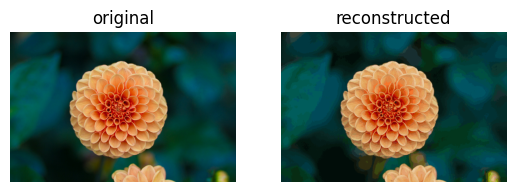

In [7]:
# 原圖
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("original")
plt.imshow(flower)

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("reconstructed")
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h));

## 再使用K-Means，設定4個集群

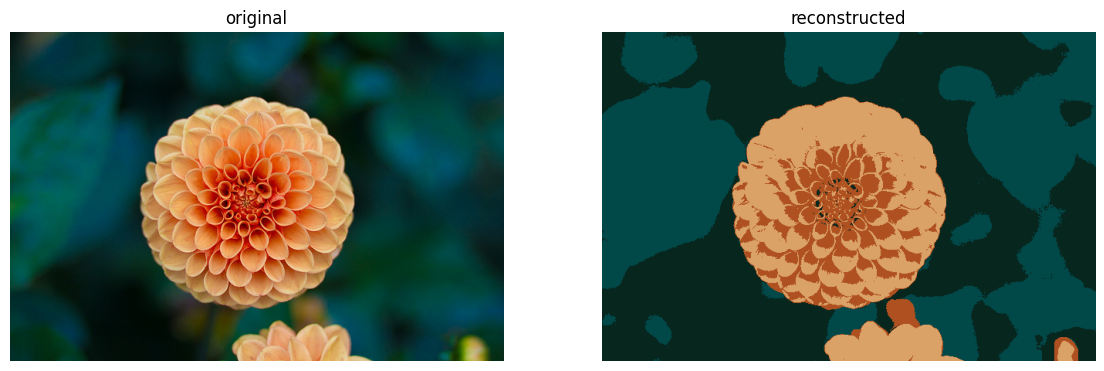

In [8]:
# K-Means模型訓練， 設定4個集群
kmeans = KMeans(n_clusters=4, random_state=42).fit(image_sample)

# 對所有像素進行集群
labels = kmeans.predict(image_array)

plt.figure(figsize=(14, 7))
# 原圖
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("original")
plt.imshow(flower)

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("reconstructed")
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h));

In [9]:
# 存檔
plt.imsave(
    "./data/flower_kmeans.jpg", reconstruct_image(kmeans.cluster_centers_, labels, w, h)
)